# Cell Type Analysis: Bangladeshi Data
Zeel Thakkar, 10.6.2020

# Imports

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [14]:
data = pd.read_csv("/Users/zeel/Desktop/GLINT_1.0.4/houseman_estimates.txt",delimiter=" ")
data

,ID,CD4+,CD8+,mono,Bcells,NK,Nue,Eos
0,A001,0.088905,0.015013,0.028650,2.822181e-02,0.077609,0.761500,1.021275e-04
1,A003,0.180442,0.077005,0.041655,8.239767e-02,0.123677,0.494823,7.777223e-07
2,A006,0.099869,0.152781,0.001844,4.538767e-07,0.022716,0.722786,3.732239e-06
3,A008_rep,0.143508,0.149229,0.013890,4.712902e-02,0.017925,0.628317,1.484442e-06
4,A008,0.159034,0.173436,0.000014,3.762579e-02,0.000009,0.629881,1.435895e-08
...,...,...,...,...,...,...,...,...
148,C411,0.151446,0.136987,0.002008,1.151378e-02,0.000386,0.697659,2.248435e-07
149,C413_rep,0.131176,0.097860,0.008106,1.752657e-02,0.025154,0.720174,3.478843e-06
150,C413,0.164687,0.099294,0.000010,2.495730e-02,0.000006,0.711044,5.836633e-07
151,C414,0.183923,0.151975,0.043601,1.675798e-02,0.044695,0.559025,2.367164e-05


In [15]:
group_ids=[]
for id in data["ID"]:
    if "A" in id:
        group_ids.append("postnatal exposure")        
    elif "B" in id:
        group_ids.append("in utero exposure")
    else:
        group_ids.append("unexposed")
print(group_ids)

['postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnatal exposure', 'postnata

In [16]:
data["group_ids"]=group_ids
data

,ID,CD4+,CD8+,mono,Bcells,NK,Nue,Eos,group_ids
0,A001,0.088905,0.015013,0.028650,2.822181e-02,0.077609,0.761500,1.021275e-04,postnatal exposure
1,A003,0.180442,0.077005,0.041655,8.239767e-02,0.123677,0.494823,7.777223e-07,postnatal exposure
2,A006,0.099869,0.152781,0.001844,4.538767e-07,0.022716,0.722786,3.732239e-06,postnatal exposure
3,A008_rep,0.143508,0.149229,0.013890,4.712902e-02,0.017925,0.628317,1.484442e-06,postnatal exposure
4,A008,0.159034,0.173436,0.000014,3.762579e-02,0.000009,0.629881,1.435895e-08,postnatal exposure
...,...,...,...,...,...,...,...,...,...
148,C411,0.151446,0.136987,0.002008,1.151378e-02,0.000386,0.697659,2.248435e-07,unexposed
149,C413_rep,0.131176,0.097860,0.008106,1.752657e-02,0.025154,0.720174,3.478843e-06,unexposed
150,C413,0.164687,0.099294,0.000010,2.495730e-02,0.000006,0.711044,5.836633e-07,unexposed
151,C414,0.183923,0.151975,0.043601,1.675798e-02,0.044695,0.559025,2.367164e-05,unexposed


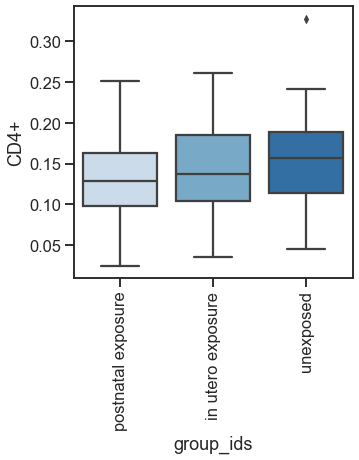

In [17]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "CD4+", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("CD4+")
plt.show()

In [18]:
X = data["CD4+"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.086603
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.009892
Time:                        17:49:49   Log-Likelihood:                -166.25
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.1900
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5105      0.549      0.930      0.352      -0.565       1.586

In [19]:
data[["ID","group_ids"]].to_csv("~/Desktop/bangl_grpids.csv",index=False,header=None)

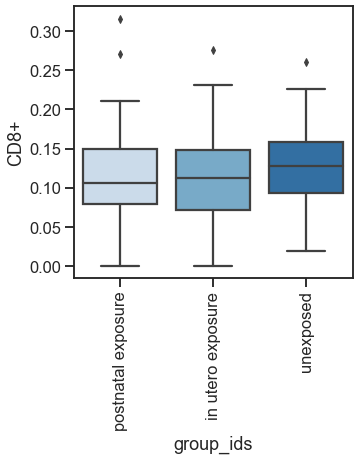

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "CD8+", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("CD8+")
plt.show()

In [21]:
X = data["CD8+"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.086097
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                 0.01035
Time:                        17:49:49   Log-Likelihood:                -166.17
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.1758
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2054      0.459     -0.448      0.654      -1.104       0.693

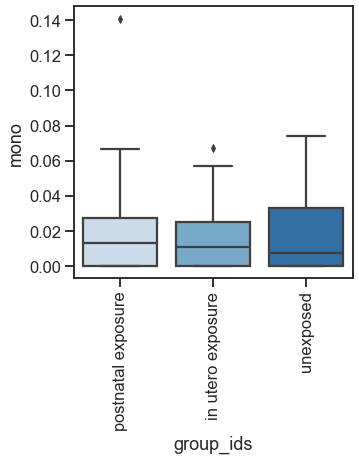

In [22]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "mono", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("mono")
plt.show()

In [24]:
X = data["mono"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.096353
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.001007
Time:                        17:57:16   Log-Likelihood:                -167.74
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.8445
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1414      0.256     -0.552      0.581      -0.643       0.361

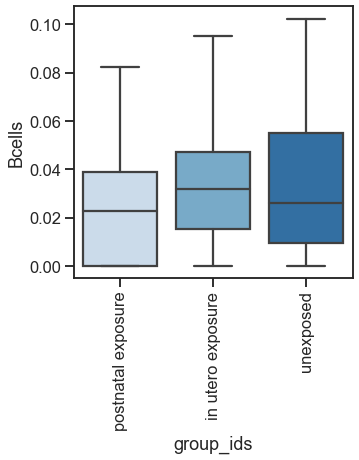

In [25]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "Bcells", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("Bcells")
plt.show()

In [26]:
X = data["Bcells"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.083912
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                 0.01234
Time:                        17:57:40   Log-Likelihood:                -165.84
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.1259
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3588      0.321      1.117      0.264      -0.271       0.988

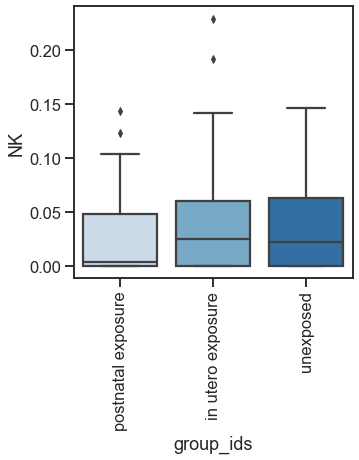

In [29]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "NK", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("NK")
plt.show()

In [28]:
X = data["NK"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.090219
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.006597
Time:                        17:58:02   Log-Likelihood:                -166.80
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.3303
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1793      0.259      0.692      0.489      -0.329       0.687

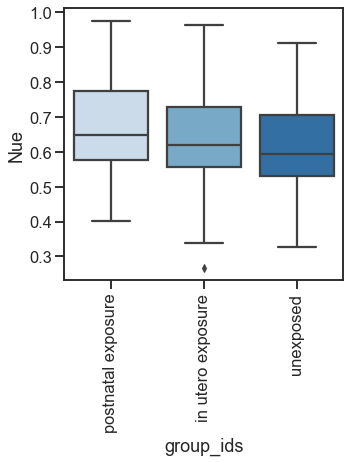

In [30]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "Nue", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("Nue")
plt.show()

In [31]:
X = data["Nue"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.084078
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                 0.01219
Time:                        17:58:24   Log-Likelihood:                -165.86
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.1291
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3166      0.984     -1.337      0.181      -3.246       0.613

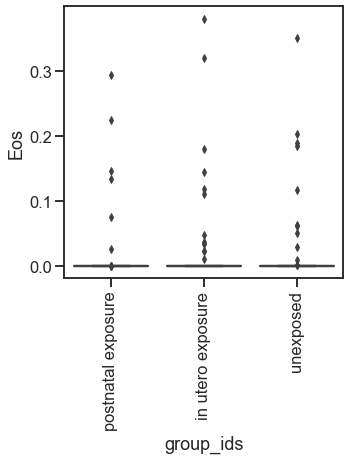

In [35]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "Eos", data=data, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("Eos")
plt.show()

In [34]:
X = data["Eos"].values
Y = data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.095894
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.001426
Time:                        17:59:06   Log-Likelihood:                -167.67
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.7871
y=postnatal exposure       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0120      0.213     -0.056      0.955      -0.430       0.406